In [51]:
# Import the necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Connect to the SQLite database
conn = sqlite3.connect('european_database.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Example: Fetch the first 10 rows from the 'matchs' table
cursor.execute("SELECT * FROM matchs LIMIT 10")
rows = cursor.fetchall()

# Print the first 10 rows as a sample
for row in rows:
    print(row)

('B1', '2020-08-08', 'Club Brugge', 'Charleroi', 0.0, 1.0, 'A', 2021)
('B1', '2020-08-08', 'Antwerp', 'Mouscron', 1.0, 1.0, 'D', 2021)
('B1', '2020-08-08', 'Standard', 'Cercle Brugge', 1.0, 0.0, 'H', 2021)
('B1', '2020-08-09', 'St Truiden', 'Gent', 2.0, 1.0, 'H', 2021)
('B1', '2020-08-09', 'Waregem', 'Genk', 1.0, 2.0, 'A', 2021)
('B1', '2020-08-09', 'Mechelen', 'Anderlecht', 2.0, 2.0, 'D', 2021)
('B1', '2020-08-09', 'Kortrijk', 'Waasland-Beveren', 1.0, 3.0, 'A', 2021)
('B1', '2020-08-10', 'Oud-Heverlee Leuven', 'Eupen', 1.0, 1.0, 'D', 2021)
('B1', '2020-08-10', 'Oostende', 'Beerschot VA', 1.0, 2.0, 'A', 2021)
('B1', '2020-08-14', 'Mouscron', 'Mechelen', 0.0, 1.0, 'A', 2021)


In [53]:
# Fetch the table schema (column names and data types)
cursor.execute("PRAGMA table_info(matchs)")
table_info = cursor.fetchall()

# Print the table schema
for column_info in table_info:
    column_name = column_info[1]
    data_type = column_info[2]
    print(f"Column Name: {column_name}, Data Type: {data_type}")

Column Name: Div, Data Type: TEXT
Column Name: Date, Data Type: DATE
Column Name: HomeTeam, Data Type: TEXT
Column Name: AwayTeam, Data Type: TEXT
Column Name: FTHG, Data Type: REAL
Column Name: FTAG, Data Type: REAL
Column Name: FTR, Data Type: TEXT
Column Name: season, Data Type: INTEGER


In [54]:
# Check for missing values in the 'FTR' column
cursor.execute("SELECT COUNT(*) FROM matchs WHERE FTR IS NULL")
missing_values_count = cursor.fetchone()[0]

# Print the count of missing values
print(f"Number of missing values in 'FTR' column: {missing_values_count}")

Number of missing values in 'FTR' column: 0


In [55]:
# Check for invalid values in the 'FTR' column
cursor.execute("SELECT DISTINCT FTR FROM matchs WHERE FTR NOT IN ('H', 'A', 'D')")
invalid_values = cursor.fetchall()

# Print any invalid values found
if invalid_values:
    print("Invalid values found in 'FTR' column:")
    for value in invalid_values:
        print(value[0])
else:
    print("No invalid values found in 'FTR' column.")

No invalid values found in 'FTR' column.


In [56]:
query = """
    SELECT
        season,
        Div AS League,
        COUNT(CASE WHEN FTR = 'H' THEN 1 END) AS HomeWins,
        COUNT(CASE WHEN FTR = 'A' THEN 1 END) AS AwayWins,
        COUNT(CASE WHEN FTR = 'D' THEN 1 END) AS Draws
    FROM
        matchs
    GROUP BY
        season, League
    ORDER BY
        season, League;
"""
# Execute the query
cursor.execute(query)

# Fetch the results if needed
results = cursor.fetchall()
results

[(2006, 'B1', 146, 80, 80),
 (2006, 'D1', 131, 79, 96),
 (2006, 'D2', 148, 91, 67),
 (2006, 'E0', 192, 111, 77),
 (2006, 'E1', 234, 145, 173),
 (2006, 'E2', 234, 145, 173),
 (2006, 'E3', 222, 152, 178),
 (2006, 'EC', 204, 137, 121),
 (2006, 'F1', 170, 92, 118),
 (2006, 'F2', 168, 86, 126),
 (2006, 'G1', 132, 52, 56),
 (2006, 'I1', 176, 96, 108),
 (2006, 'I2', 216, 95, 151),
 (2006, 'N1', 151, 95, 60),
 (2006, 'P1', 140, 90, 76),
 (2006, 'SC0', 97, 74, 57),
 (2006, 'SC1', 69, 50, 61),
 (2006, 'SC2', 78, 67, 35),
 (2006, 'SC3', 85, 61, 34),
 (2006, 'SP1', 162, 113, 105),
 (2006, 'SP2', 213, 118, 131),
 (2006, 'T1', 128, 98, 80),
 (2007, 'B1', 153, 70, 83),
 (2007, 'D1', 134, 93, 79),
 (2007, 'D2', 135, 85, 86),
 (2007, 'E0', 182, 100, 98),
 (2007, 'E1', 266, 163, 123),
 (2007, 'E2', 249, 164, 139),
 (2007, 'E3', 247, 163, 142),
 (2007, 'EC', 240, 178, 134),
 (2007, 'F1', 181, 82, 117),
 (2007, 'F2', 189, 79, 112),
 (2007, 'G1', 114, 63, 63),
 (2007, 'I1', 173, 93, 114),
 (2007, 'I2', 205

In [57]:
# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(query, conn)

##### Identify any patterns or trends in match outcomes over the years

In [58]:
df['TotalMatches'] = df['HomeWins'] + df['AwayWins'] + df['Draws']

In [59]:
df['HomeWinPercentage'] = (df['HomeWins'] / df['TotalMatches']) * 100
df['AwayWinPercentage'] = (df['AwayWins'] / df['TotalMatches']) * 100
df['DrawPercentage'] = (df['Draws'] / df['TotalMatches']) * 100

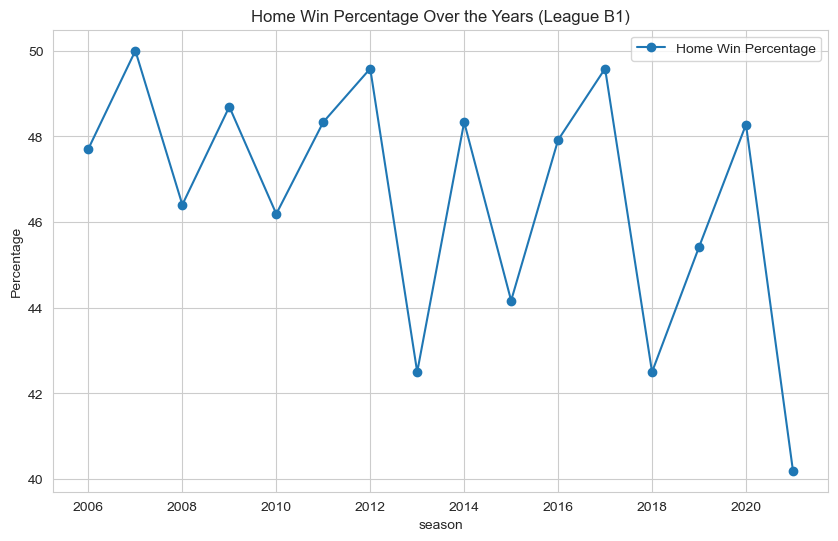

In [60]:
# Filter data for a specific league (e.g., 'B1')
filtered_df = df[df['League'] == 'B1']

# Create a line chart for Home win percentages
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['season'], filtered_df['HomeWinPercentage'], marker='o', linestyle='-', label='Home Win Percentage')
plt.xlabel('season')
plt.ylabel('Percentage')
plt.title('Home Win Percentage Over the Years (League B1)')
plt.legend()
plt.grid(True)
plt.show()